In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.style.use("ggplot")

: 

Text(0.5, 1.0, 'Probability of disease given positive test result, $\\beta$=0.01')

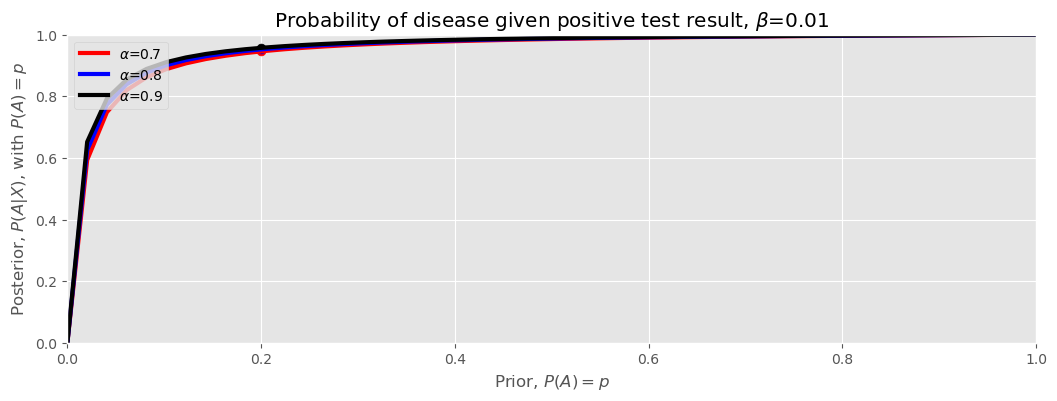

In [2]:
# For example 1 - Disease - modified version of bug problem taken from 
# https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC_current.ipynb


figsize(12.5, 4)
p = np.linspace(0, 1, 50)
alpha_vals = [0.7,0.8,0.9]
beta = 0.01
def posterior_vals(p: float,alpha: float, beta: float):
    return (alpha*p)/(alpha*p + beta*(1-p))

color_vals = ["red","blue","black"]
for i in range(len(alpha_vals)):
    plt.plot(p, posterior_vals(p,alpha_vals[i],beta), color=color_vals[i], lw=3, label = r"$\alpha$"+f'={alpha_vals[i]}')
    #plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
    plt.scatter(0.2, posterior_vals(0.2,alpha_vals[i],beta), s=40, c=color_vals[i])

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc="upper left")
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title(r"Probability of disease given positive test result, $\beta$" + f'={beta}')

In [ ]:
# Inspired by https://risk-engineering.org/notebook/monte-carlo-pi.html

N_samples = 50000
inside = []

# Randomly sample N_samples points, check how many of them lie within the unit circle
def get_unit_circle(N_samples):
    x = np.random.uniform(-1, 1, size=N_samples)
    y = np.random.uniform(-1, 1, size=N_samples)
    area = x**2 + y**2
    inside = [(x[i],y[i]) for i in range(N_samples) if area[i] < 1]
    pi_estimate = 4 * len(inside)/float(N_samples)

    return inside, pi_estimate
 

# Estimate pi as fraction of area of the circle inside the square is (pi*(1/4), so pi = fraction*4, fraction = number of points inside circle/total number of points)

# Visualize the "inside" sampled points
plt.figure(figsize=(6, 6))
inside, pi_estimate = get_unit_circle(N_samples)
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.5);
plt.title(f"Estimate of pi using {N_samples} points is {pi_estimate:.4f}")

: 

In [ ]:

from pymc3 import  *